создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.

In [ ]:
!pip install -q tensorflow

In [32]:
# Импортируем библиотеки
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
#import tensorflow.keras.layers as L  # Импорт слоев для нейронных сетей в Keras
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [33]:
# Загрузка данных fashion mnist
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [34]:
# Обозначим классы
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

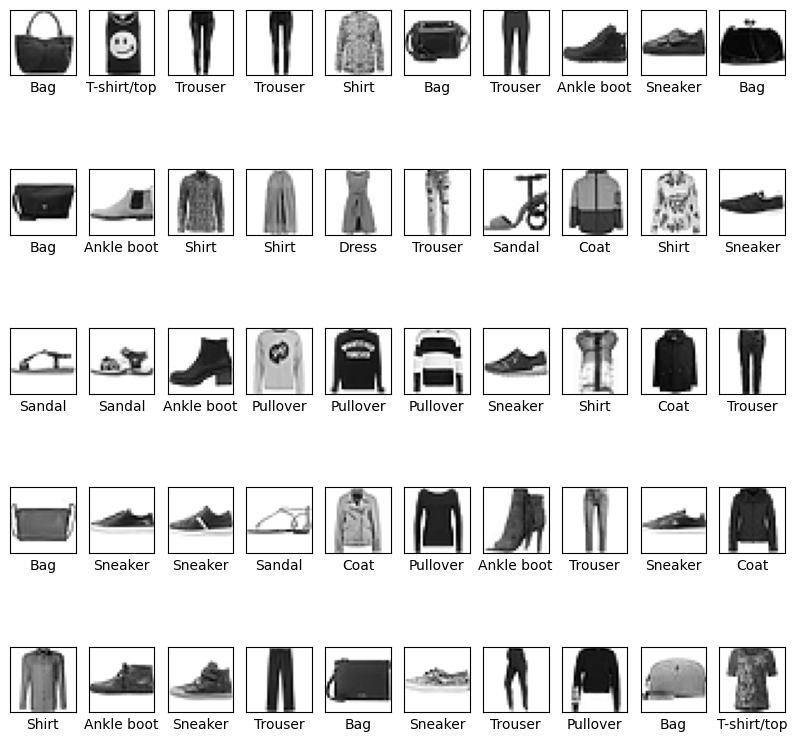

In [35]:
# Просмотр данных набора
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [5]:
# Преобразование размерности данных
#x_train = x_train.reshape(60000, 784)
#x_test = x_test.reshape(10000, 784)

In [36]:
# Нормализация данных
x_train = x_train.astype(float) / 255 -0.5
x_test = x_test.astype(float) / 255 -0.5

In [37]:
# Преобразуем метки в формат one hot encoding
y_train = utils.to_categorical(y_train, 10)

In [38]:
y_test = utils.to_categorical(y_test, 10)

In [39]:
# Размеры матрицы данных
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [40]:
# Правильный ответ в формате one hot encoding
n = 0
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [41]:
# Очистка текущего графа и освобождение ресурсов TensorFlow/Keras
clear_session()

# Создание новой модели с использованием изображения как входа (без вытягивания в вектор)
model = Sequential()  # Определяем модель как последовательную (слои будут добавляться последовательно)

# Добавление сверточного слоя (Conv2D) с 16 фильтрами 3x3, шагом 1 и сохранением размерности (padding='same')
# Входной слой принимает изображение размером 28x28 с одним каналом (черно-белое изображение)
model.add(Conv2D(16, kernel_size=3, strides=1, padding='same', input_shape=(28,28,1)))

# Добавление второго сверточного слоя (Conv2D) с 32 фильтрами 3x3
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same'))


# Добавление третьего сверточного слоя (Conv2D) с 64 фильтрами 3x3
model.add(Conv2D(64, kernel_size=3, strides=1, padding='same'))


# Преобразование многомерного тензора в одномерный вектор перед плотным слоем
model.add(Flatten())

# Добавление полносвязного (Dense) слоя с 10 нейронами и функцией активации softmax для классификации на 10 классов
model.add(Dense(10, activation='softmax'))

In [42]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         501,770 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 525,066 (2.00 MB)

 Trainable params: 525,066 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

None


In [43]:
history = model.fit(x_train,
                    y_train,
                    batch_size=200,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7704 - loss: 0.6606 - val_accuracy: 0.8414 - val_loss: 0.4526
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8466 - loss: 0.4396 - val_accuracy: 0.8458 - val_loss: 0.4456
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8572 - loss: 0.4138 - val_accuracy: 0.8417 - val_loss: 0.4637
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8605 - loss: 0.3994 - val_accuracy: 0.8460 - val_loss: 0.4423
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8626 - loss: 0.3944 - val_accuracy: 0.8505 - val_loss: 0.4350
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8639 - loss: 0.3881 - val_accuracy: 0.8441 - val_loss: 0.4416
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8687 - loss: 0.3849 - val_accuracy: 0.8464 - val_loss: 0.4410
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8654 - loss: 0.3851 - val_accu

In [44]:
model.save('fashion_mnist_dense.keras')

In [45]:
# Проверка качества работы на наборе данных для тестирования
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8374 - loss: 0.4720


In [46]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 83.33


In [47]:
n_rec = 502

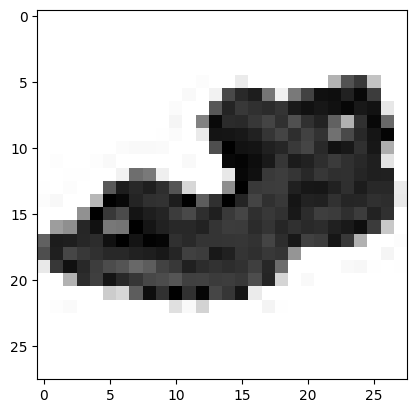

In [48]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [49]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

In [50]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


In [51]:
prediction

array([[2.2726994e-07, 4.0569934e-10, 1.0157591e-07, 3.2083685e-09,
        1.0083287e-06, 9.9249369e-01, 8.9070880e-07, 2.5325704e-03,
        1.4126734e-06, 4.9700961e-03]], dtype=float32)

In [52]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 5
Название класса: Sandal
